<a href="https://colab.research.google.com/github/jasur-rasulov/New-York-City-Taxi-Fare-Forecasting/blob/master/3.%20Predictive_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Predictive Algortihms*

---

### Pre-Processing the Data for Modeling

In [0]:
labels = np.array(train['fare_amount'])
train1 = train.drop('fare_amount', axis = 1)
train1 = train1.drop('pickup_datetime', axis = 1)
train1 = train1.drop('key', axis = 1)
attributes_list = list(train1.columns)
train_rf = np.array(train1)

In [0]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(train1, labels, test_size = 0.2, random_state = 42)

### *Linear Regression*

---

In [0]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [0]:
LR.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
LRpredictions = LR.predict(test_features)
LRerrors = abs(LRpredictions - test_labels)
print('Mean Absolute Error:', "$",round(np.mean(LRerrors), 2))

Mean Absolute Error: $ 5.99


In [0]:
LRmape = 100 * (LRerrors / test_labels)
LRaccuracy = 100 - np.mean(LRmape)
print('Accuracy:', round(LRaccuracy, 2), '%.')

Accuracy: 32.39 %.


### *Random Forests*

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 250, random_state = 561)

In [0]:
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=561, verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', "$",round(np.mean(errors), 2))

Mean Absolute Error: $ 1.96


In [0]:
# Calculate mean absolute percentage error (MAPE) and Accuracy
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 73.66 %.


In [0]:
# Get numerical feature importances
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), attributes_list), 
             reverse=True))

Features sorted by their score:
[(0.7189, 'distance_miles'), (0.044, 'abs_diff_longitude'), (0.0422, 'dropoff_longitude'), (0.0282, 'dropoff_latitude'), (0.0256, 'pickup_longitude'), (0.0193, 'pickup_latitude'), (0.0193, 'abs_diff_latitude'), (0.0184, 'Date'), (0.0144, 'Month'), (0.0143, 'year'), (0.0141, 'Year'), (0.0119, 'hour'), (0.0117, 'Hour'), (0.0064, 'weekday'), (0.0064, 'Day of Week'), (0.005, 'passenger_count')]


### *Gradient Boosted Models*

---

In [0]:
"""Preprocessing and metrics"""
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

"""Regressors"""
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
% matplotlib inline

#### Removing fake fares

In [0]:
k = 0
for i in data.fare_amount:
    if i < 0:
        k += 1
print("Number of fake fares: ", k)

Number of fake fares:  0


In [0]:
print('Length of original data: %d' % len(data))
data = data[data.fare_amount>=0]
print('Lengh of new data: %d' % len(data))

Length of original data: 1957918
Lengh of new data: 1957918


#### Adding new features

In [0]:
data['lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_train  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'lat_change',
               'lon_change']

In [0]:
Y = data.fare_amount.as_matrix()
X = data[features_train]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
Y = np.reshape(Y,(Y.shape[0],1))

In [0]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,lat_change,lon_change
0,-73.844311,40.721319,-73.841610,40.712278,0.009041,0.002701
1,-74.016048,40.711303,-73.979268,40.782004,0.070701,0.036780
2,-73.982738,40.761270,-73.991242,40.750562,0.010708,0.008504
3,-73.987130,40.733143,-73.991567,40.758092,0.024949,0.004437
4,-73.968095,40.768008,-73.956655,40.783762,0.015754,0.011440


#### Scaling the Y vector

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
Y = min_max_scaler.fit_transform(Y)

#### Prepping data for GBM and Regression Modules

In [0]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
class Regressors:
    def __init__(self, Xtrain, Xtest, Ytrain, Ytest):
        """Initializing"""
        self.Xtrain = Xtrain
        self.Xtest = Xtest
        self.Ytrain = Ytrain
        self.Ytest = Ytest

    def def_xgboost(self, estimators):
        """Defining the XGBoosting regressor"""
        xgb_ = xgb.XGBRegressor(objective ='reg:linear', learning_rate=0.01, max_depth=3, n_estimators=estimators)
        xgb_.fit(self.Xtrain, self.Ytrain)
        pred = xgb_.predict(self.Xtest)
        
        return pred

    def def_RandomForestRegressor(self, estimators):
        """Defining the Random Forest Regeressor"""
        rfr_ = RandomForestRegressor(n_estimators=estimators, max_depth=3)
        rfr_.fit(self.Xtrain, self.Ytrain)
        pred = rfr_.predict(self.Xtest)

        return pred

    def def_GradientBoostingRegressor(self, estimators):
        """Defining the Gradient Boosting Regressor"""
        gbr_ = GradientBoostingRegressor(n_estimators=estimators, max_depth=3)
        gbr_.fit(self.Xtrain, self.Ytrain)
        pred = gbr_.predict(self.Xtest)

        return pred

    def def_AdaBoostRegressor(self, estimators):
        """Defining Ada Boosting Regressor"""
        abr_ = AdaBoostRegressor(n_estimators=estimators)
        abr_.fit(self.Xtrain, self.Ytrain)
        pred = abr_.predict(self.Xtest)

        return pred

In [0]:
def def_metrics(ypred):
    mae = mean_absolute_error(Ytest, ypred)
    mse = mean_squared_error(Ytest, ypred)

    return mae, mse

def plot_performance(plot_name, loss_mae, loss_mse):
    steps = np.arange(50, 500, 50)
    plt.style.use('ggplot')
    plt.title(plot_name)
    plt.plot(steps, loss_mae, linewidth=3, label="MAE")
    plt.plot(steps, loss_mse, linewidth=3, label="MSE")
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Number of estimators")
    plt.show()

In [0]:
"""Initializing the class"""
model = Regressors(Xtrain, Xtest, Ytrain, Ytest)

#### XGBoost and Gradient Boosting

XGBoosting Regressor
Number of estimators: 50
MAE:  0.2888066804320755
MSE:  0.08360504818876756
Number of estimators: 100
MAE:  0.17475931468397607
MSE:  0.030663107493698515
Number of estimators: 150
MAE:  0.10579375803818994
MSE:  0.0112804596279712
Number of estimators: 200
MAE:  0.06416962520016152
MSE:  0.004182987766296976
Number of estimators: 250
MAE:  0.03909705000145487
MSE:  0.001582574581406642
Number of estimators: 300
MAE:  0.024044114222322877
MSE:  0.0006292596962297839
Number of estimators: 350
MAE:  0.015165080139953957
MSE:  0.00027920448862729495
Number of estimators: 400
MAE:  0.010128313591601434
MSE:  0.0001503723305430472
Number of estimators: 450
MAE:  0.00738883652909441
MSE:  0.00010273934153811595


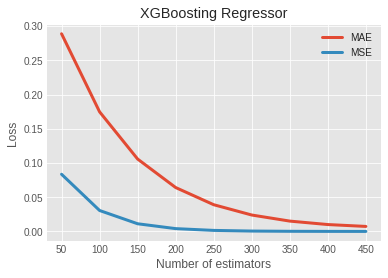

In [0]:
plot_name="XGBoosting Regressor"
loss_mae, loss_mse = [], []
print(plot_name)
for est in range(50,500,50):
    print("Number of estimators: %d" % est)
    mae, mse = def_metrics(model.def_xgboost(estimators = est))
    print("MAE: ", mae)
    print("MSE: ", mse)
    loss_mae.append(mae)
    loss_mse.append(mse)
plot_performance(plot_name, loss_mae, loss_mse)

Gradient Boosting Regressor
Number of estimators: 50
MAE:  0.2888066804320755
MSE:  0.08360504818876756
Number of estimators: 100
MAE:  0.17475931468397607
MSE:  0.030663107493698515
Number of estimators: 150
MAE:  0.10579375803818994
MSE:  0.0112804596279712
Number of estimators: 200
MAE:  0.06416962520016152
MSE:  0.004182987766296976
Number of estimators: 250
MAE:  0.03909705000145487
MSE:  0.001582574581406642
Number of estimators: 300
MAE:  0.024044114222322877
MSE:  0.0006292596962297839
Number of estimators: 350
MAE:  0.015165080139953957
MSE:  0.00027920448862729495
Number of estimators: 400
MAE:  0.010128313591601434
MSE:  0.0001503723305430472
Number of estimators: 450
MAE:  0.00738883652909441
MSE:  0.00010273934153811595


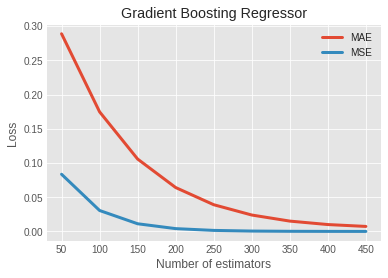

In [0]:
plot_name="Gradient Boosting Regressor"
loss_mae, loss_mse = [], []
print(plot_name)
for est in range(50,500,50):
    print("Number of estimators: %d" % est)
    mae, mse = def_metrics(model.def_xgboost(estimators = est))
    print("MAE: ", mae)
    print("MSE: ", mse)
    loss_mae.append(mae)
    loss_mse.append(mse)
plot_performance(plot_name, loss_mae, loss_mse)